In [55]:
#standard imports and setups used during EAE127
import math
import numpy as np 
import os
import matplotlib.pyplot as plt 
import matplotlib.lines as mlines
#Disable Python Warning Output
#(NOTE: Only for production, comment out for debugging)
import warnings
warnings.filterwarnings('ignore')
### PLOTTING DEFAULTS BOILERPLATE (OPTIONAL) #########################
#SET DEFAULT FIGURE APPERANCE
import seaborn as sns #Fancy plotting package 
#No Background fill, legend font scale, frame on legend
sns.set_theme(style='whitegrid', font_scale=1.5, rc={'legend.frameon': True})
#Mark ticks with border on all four sides (overrides 'whitegrid')
sns.set_style('ticks')
#ticks point in
sns.set_style({"xtick.direction": "in","ytick.direction": "in"})
#fix invisible marker bug
sns.set_context(rc={'lines.markeredgewidth': 0.1})
#restore default matplotlib colormap
mplcolors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd',
'#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']
sns.set_palette(mplcolors)

#Get color cycle for manual colors
colors = sns.color_palette()
#SET MATPLOTLIB DEFAULTS
#(call after seaborn, which changes some defaults)
params = {
#FONT SIZES
'axes.labelsize' : 30, #Axis Labels
'axes.titlesize' : 30, #Title
'font.size' : 28, #Textbox
'xtick.labelsize': 22, #Axis tick labels
'ytick.labelsize': 22, #Axis tick labels
'legend.fontsize': 15, #Legend font size
'font.family' : 'serif',
'font.fantasy' : 'xkcd',
'font.sans-serif': 'Helvetica',
'font.monospace' : 'Courier',
#AXIS PROPERTIES
'axes.titlepad' : 2*6.0, #title spacing from axis
'axes.grid' : True, #grid on plot
'figure.figsize' : (8,8), #square plots
'savefig.bbox' : 'tight', #reduce whitespace in saved figures
#LEGEND PROPERTIES
'legend.framealpha' : 0.5,
'legend.fancybox' : True,
'legend.frameon' : True,
'legend.numpoints' : 1,
'legend.scatterpoints' : 1,
'legend.borderpad' : 0.1,
'legend.borderaxespad' : 0.1,
'legend.handletextpad' : 0.2,
'legend.handlelength' : 1.0,
'legend.labelspacing' : 0,
}
import matplotlib #type:ignore
matplotlib.rcParams.update(params) #update matplotlib defaults, call after￿
### END OF BOILERPLATE ##################################################
colors = sns.color_palette() #color cycle

In [56]:
#main code

k = 1.4
Cp = 0.2399565 #BTU/(lbm * Rankine)
R = 53.35 #ft * lbf / (lbm * Rankine)

mdot = 156.9 #lbm/s
deltaH = 18200 #Btu/lbm
Tt4 = 2340 #Rankine

Pa = 14.696 #ambient pressure
Ta = 518.67 #ambient temperature

Ma = 0.9

def calcPressRatio(piC = 14.6,piF = 2.462625,alpha = 1.35,Ma = 0.9):
    
    aa = (k*R*Ta*32.17) ** (1/2)
    ua = Ma * aa

    #fan and duct
    tauF = piF ** ((k-1)/k)

    Pta = Pa * (1 + ((k-1)/2) * Ma ** 2) ** (k/(k-1))
    Pt1 = Pta
    Pt2 = Pta
    Pt7 = Pt2 * piF

    Tta = Ta * (1 + ((k-1)/2)*Ma**2)
    Tt1 = Tta
    Tt2 = Tta
    Tt7 = Tt2 * tauF

    #compressor
    tauC = piC ** ((k-1)/k)
    
    Tt3 = Tt2 * tauC
    Pt3 = Pt2 * piC

    #Turbine
    Pt4 = Pt3

    Tt5 = Tt4 - Tt3 + Tt2 - alpha*(Tt7 - Tt2)
    tauT = Tt5/Tt4
    piT = tauT ** (k/(k-1))

    Pt5 = Pt4*piT

    #combustor
    mdot_f = mdot * Cp * (Tt4 - Tt3) / deltaH

    #mixer
    Tt6 = (alpha*Tt7 + Tt5) / (alpha + 1)

    #nozzle
    Tt8 = Tt6
    Pt8 = Pt5
    P8 = Pa
    
    M8 = ((2/(k-1)) * ((Pt8/P8) ** ((k-1)/k) - 1)) ** (1/2)
    T8 = Tt8 / (1 + ((k-1)/2)*M8**2)
    a8 = (k * R * T8 * 32.17) ** (1/2)

    u8 = M8 * a8

    F = ((1 + alpha)*mdot*(u8 - ua) + mdot_f * u8)/32.17
    TSFC = mdot_f/F * 3600
    nonDimensionalThrust = F * 32.17 / ((1 + alpha)*mdot*aa)
    nonDimensionalCoreThrust = nonDimensionalThrust * (1+alpha)



    TSFCaa = TSFC * aa / 3600 / 32.17
    
    #print(F)
    #print(TSFC)
    #print(nonDimensionalThrust)

    return TSFCaa, nonDimensionalThrust, nonDimensionalCoreThrust





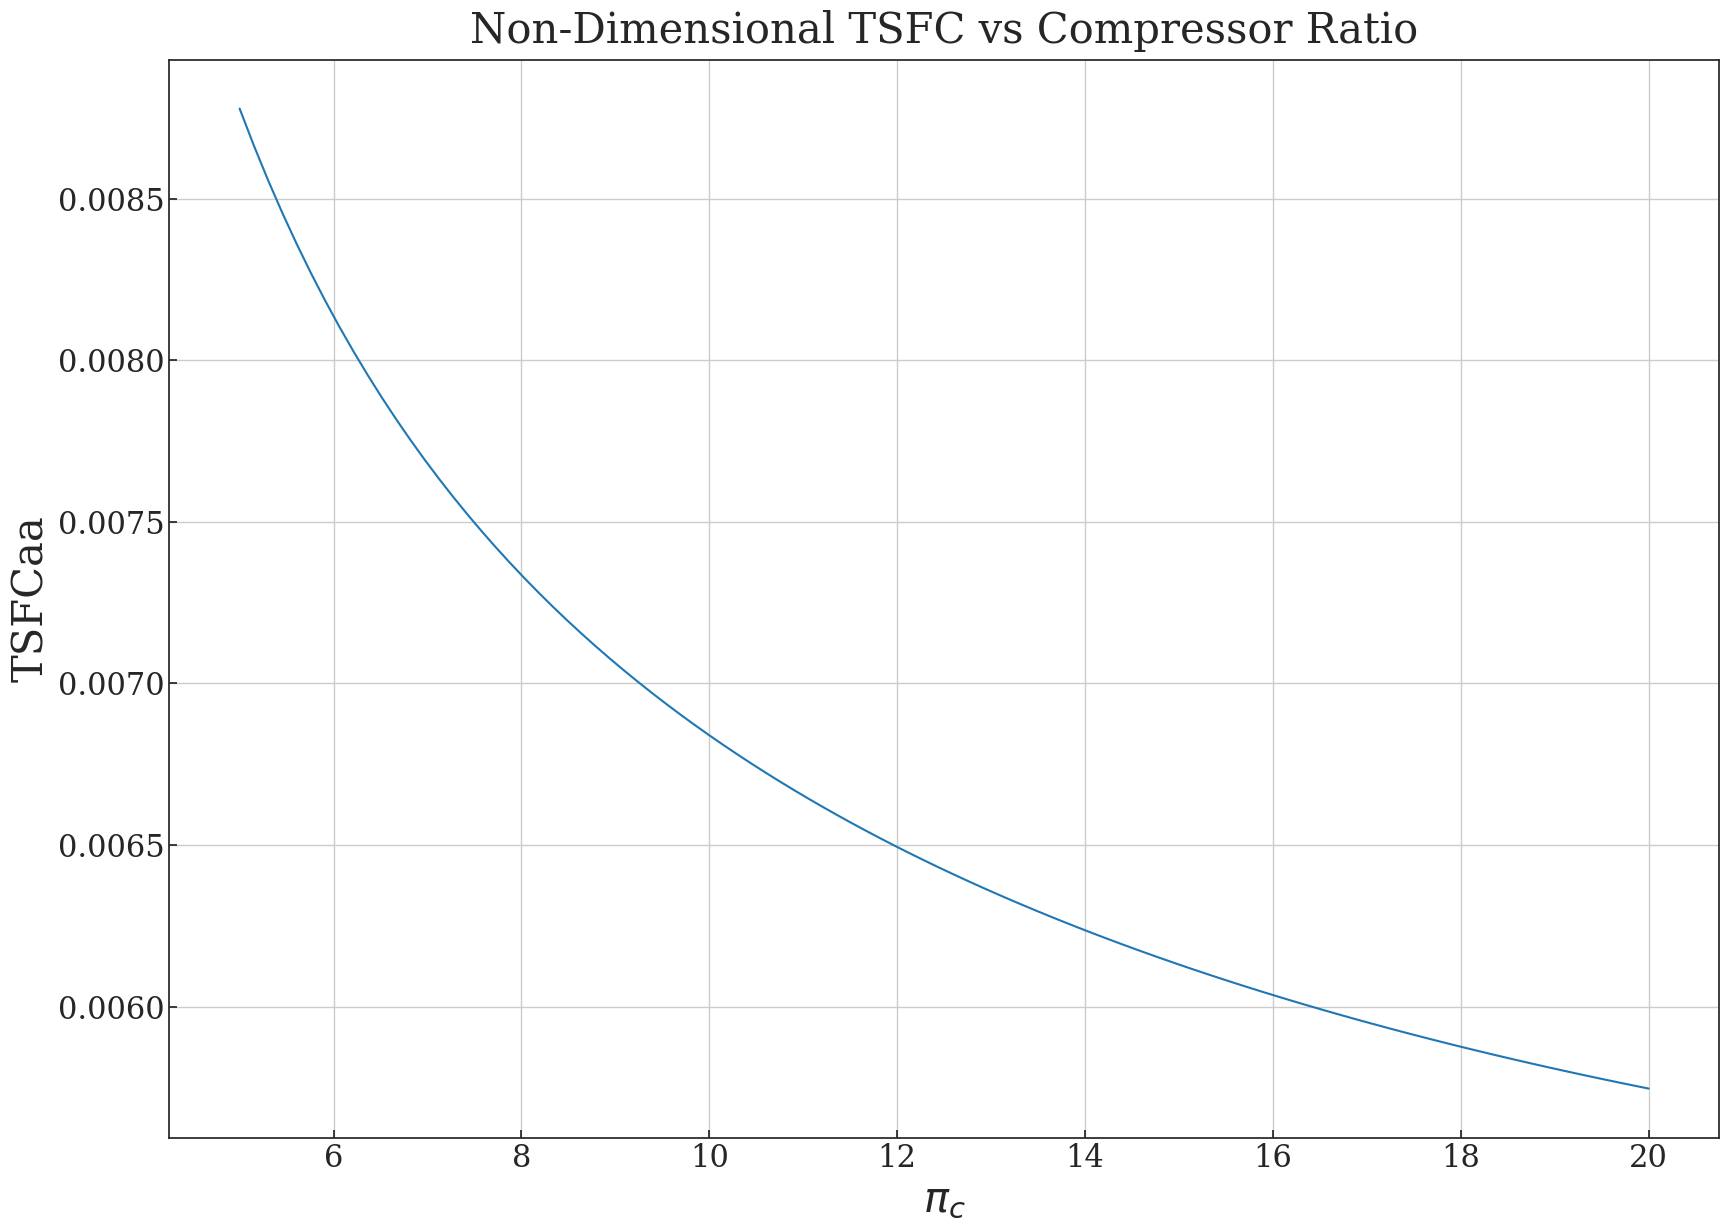

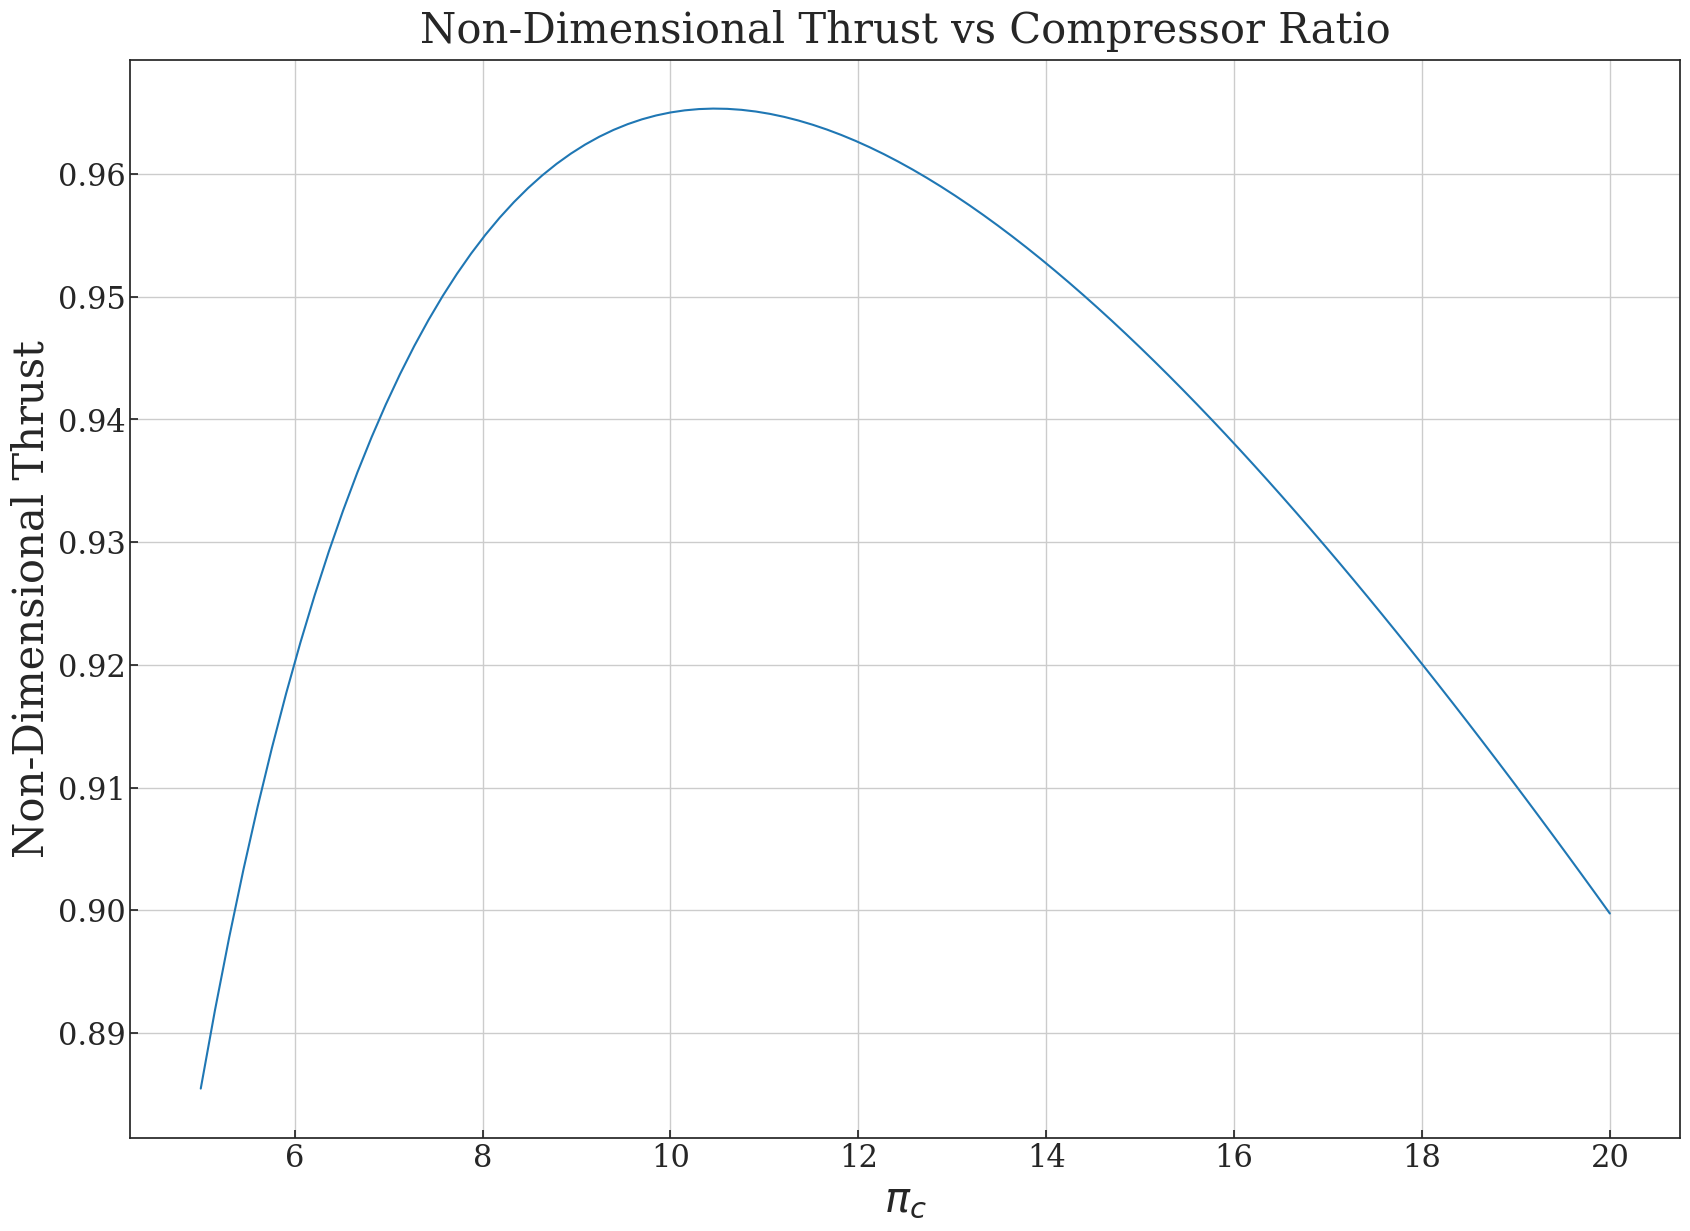

In [57]:
#part 1
x = np.linspace(5,20,100)

TSFCaa, nonDimensionalThrust, ndct = calcPressRatio(piC=x)

plt.figure(figsize=(20,14))
plt.title("Non-Dimensional TSFC vs Compressor Ratio")
plt.plot(x,TSFCaa,linestyle = "-",color = colors[0],label = "TSFCaa")
plt.xlabel("$\pi_c$")
plt.ylabel("TSFCaa")

plt.figure(figsize=(20,14))
plt.title("Non-Dimensional Thrust vs Compressor Ratio")
plt.plot(x,nonDimensionalThrust,color = colors[0],label = "NDThrust")
plt.xlabel("$\pi_c$")
plt.ylabel("Non-Dimensional Thrust");



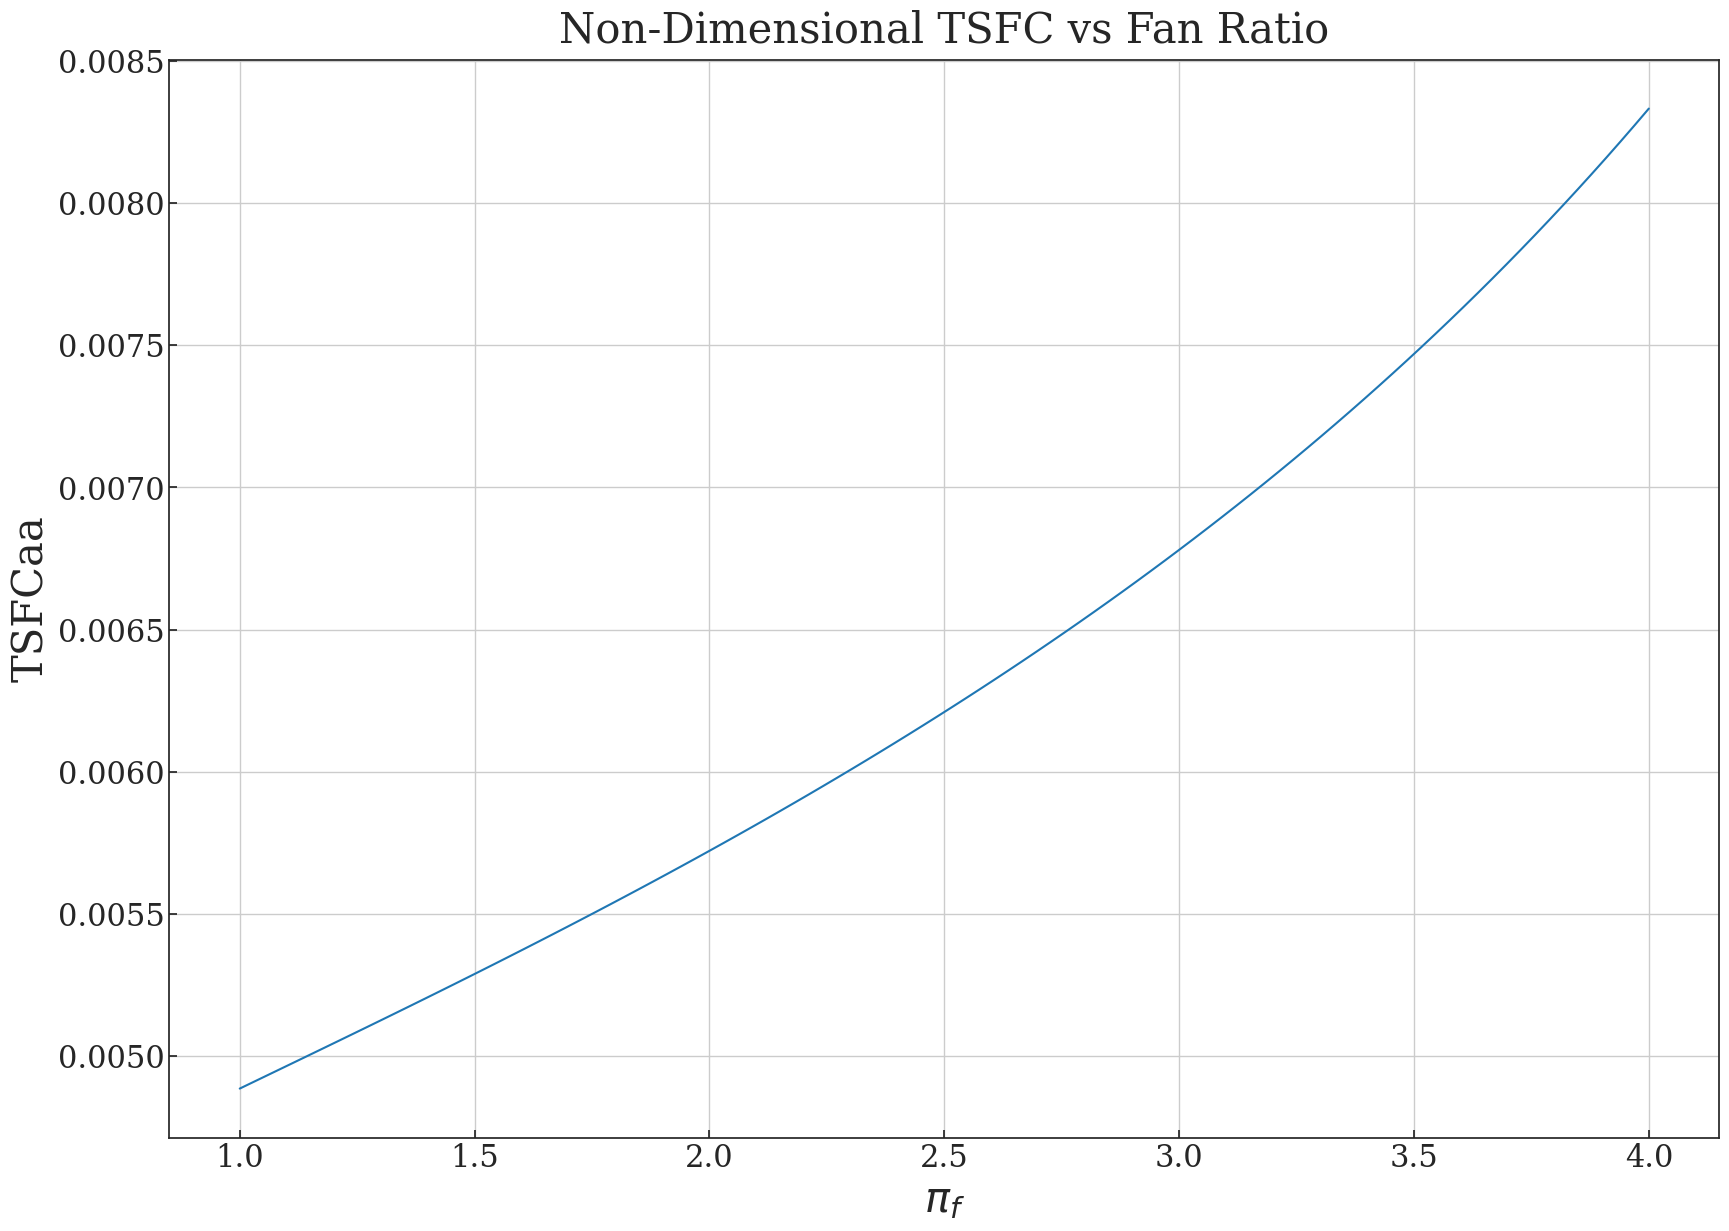

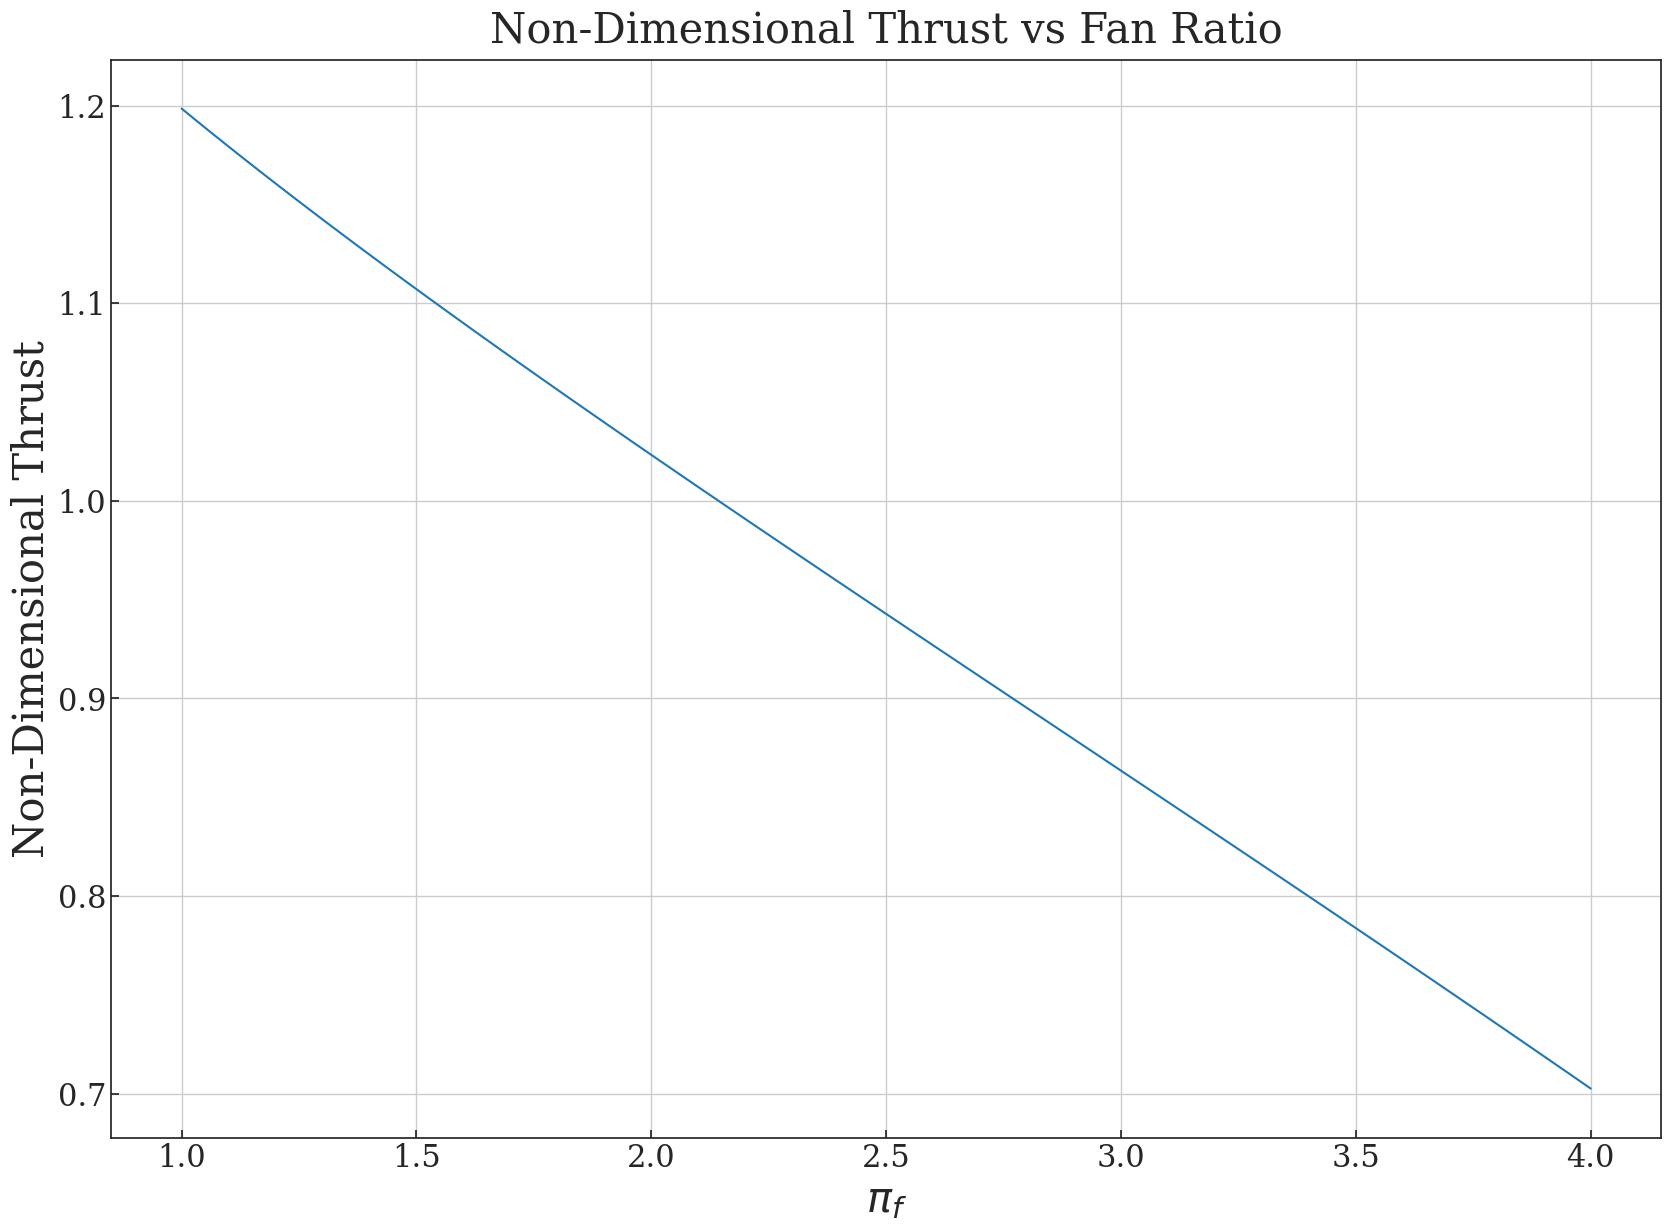

In [58]:
#part 2

x = np.linspace(1,4,100)
TSFCaa, nonDimensionalThrust, ndct = calcPressRatio(piF=x)

plt.figure(figsize=(20,14))
plt.title("Non-Dimensional TSFC vs Fan Ratio")
plt.plot(x,TSFCaa,linestyle = "-",color = colors[0],label = "TSFCaa")
plt.xlabel("$\pi_f$")
plt.ylabel("TSFCaa")

plt.figure(figsize=(20,14))
plt.title("Non-Dimensional Thrust vs Fan Ratio")
plt.plot(x,nonDimensionalThrust,color = colors[0],label = "NDThrust")
plt.xlabel("$\pi_f$")
plt.ylabel("Non-Dimensional Thrust");



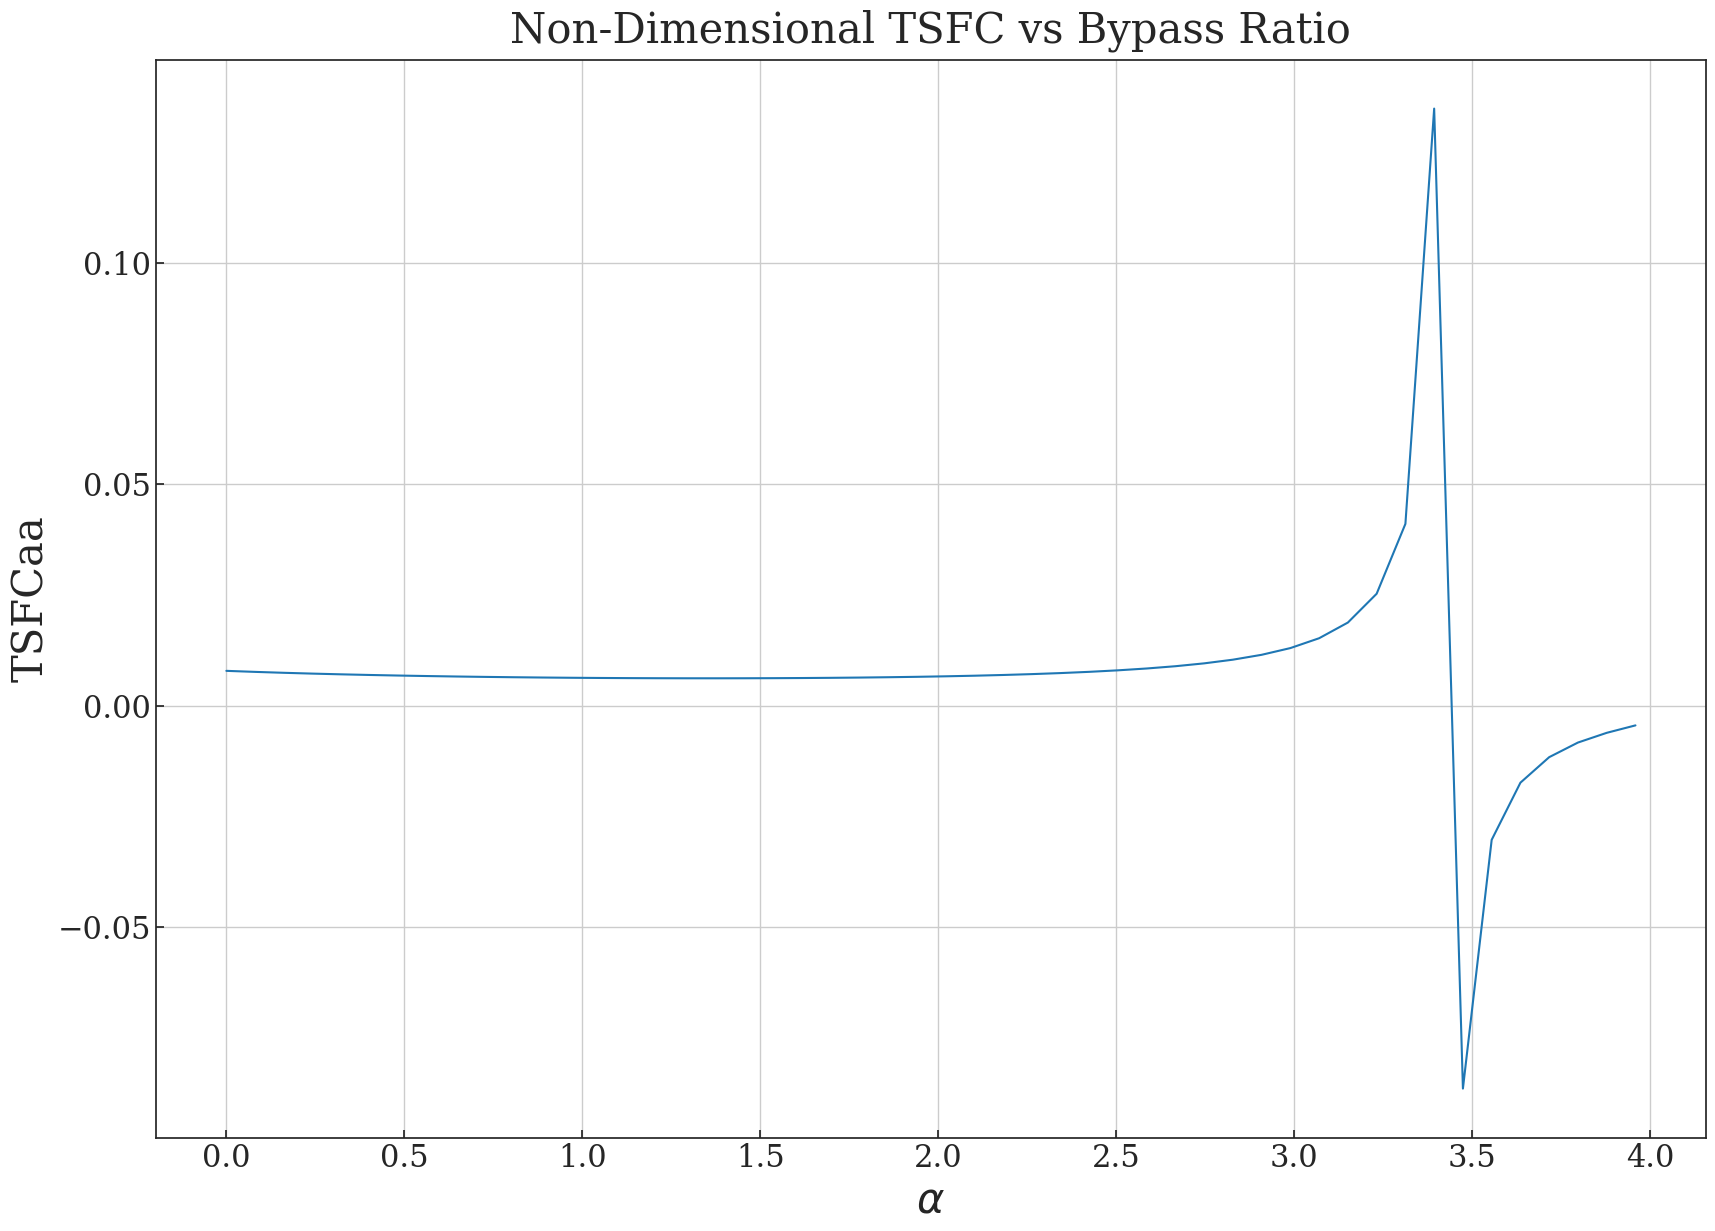

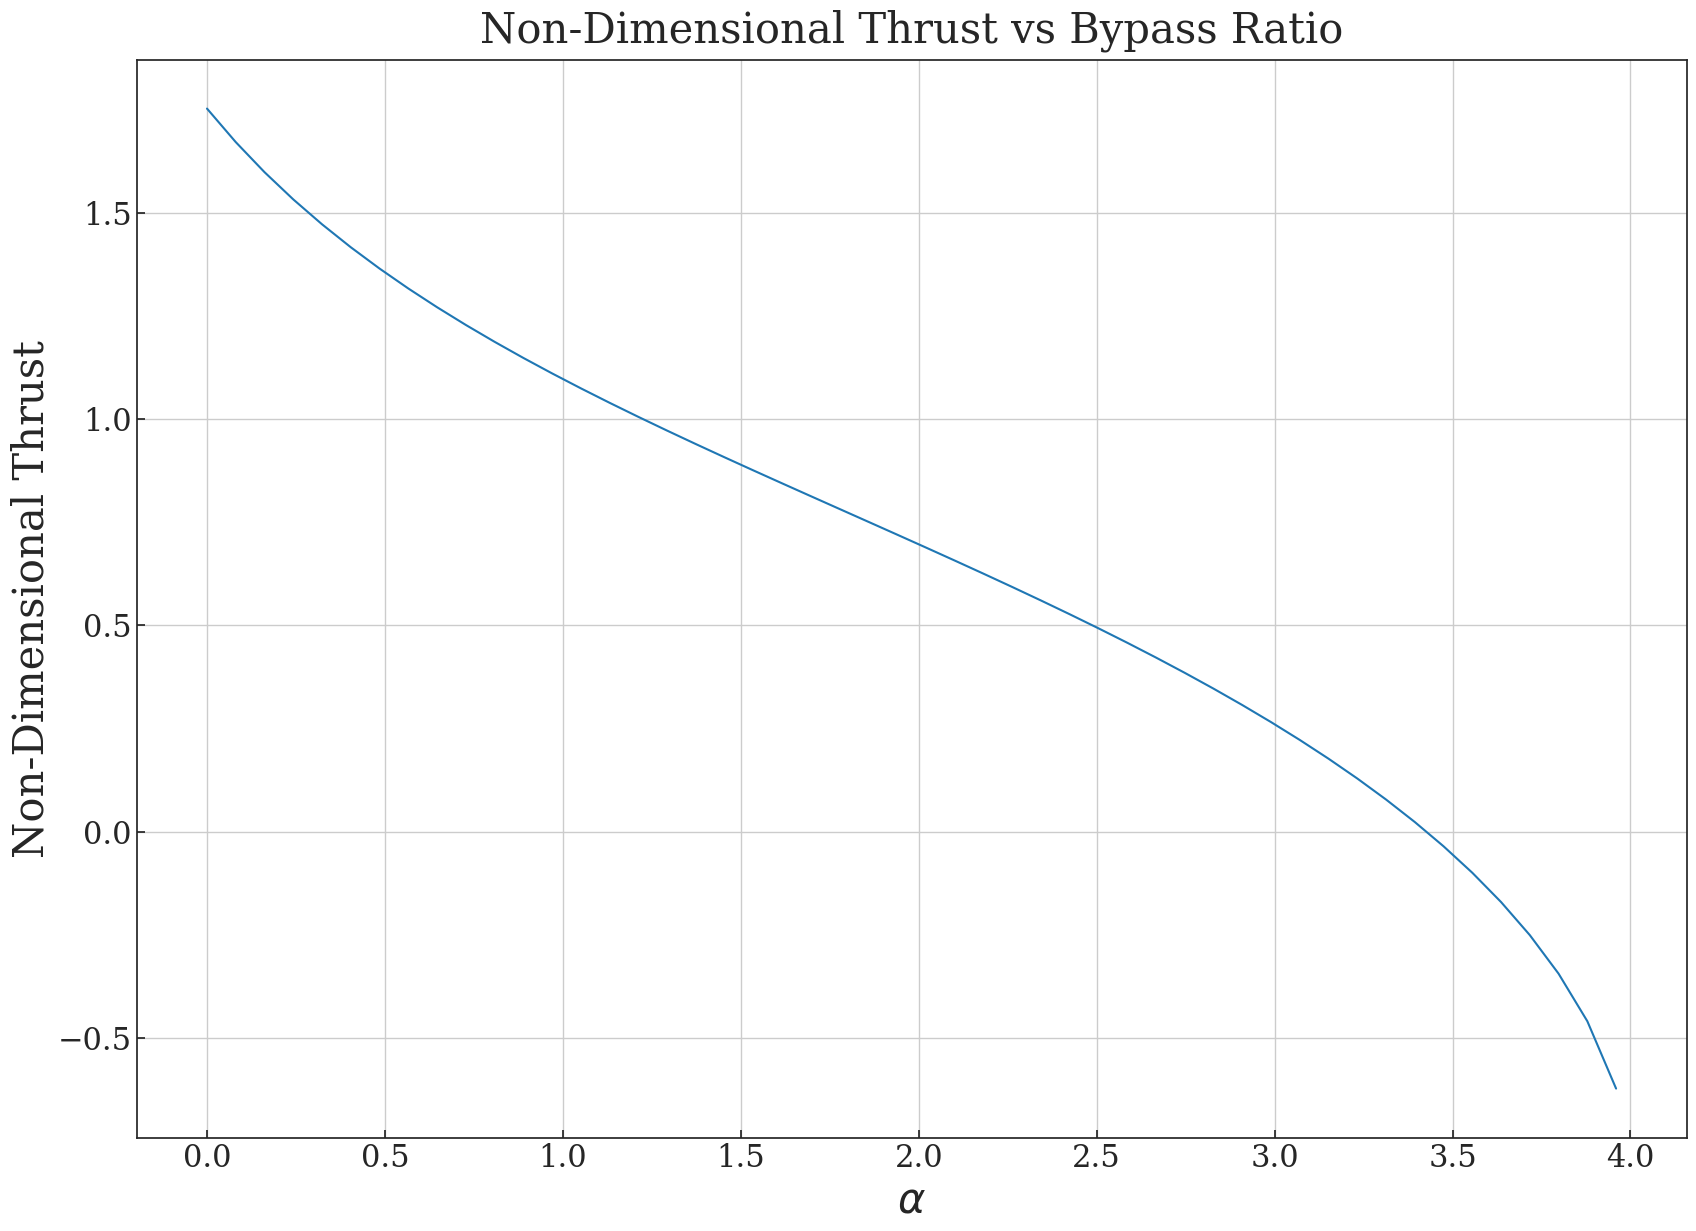

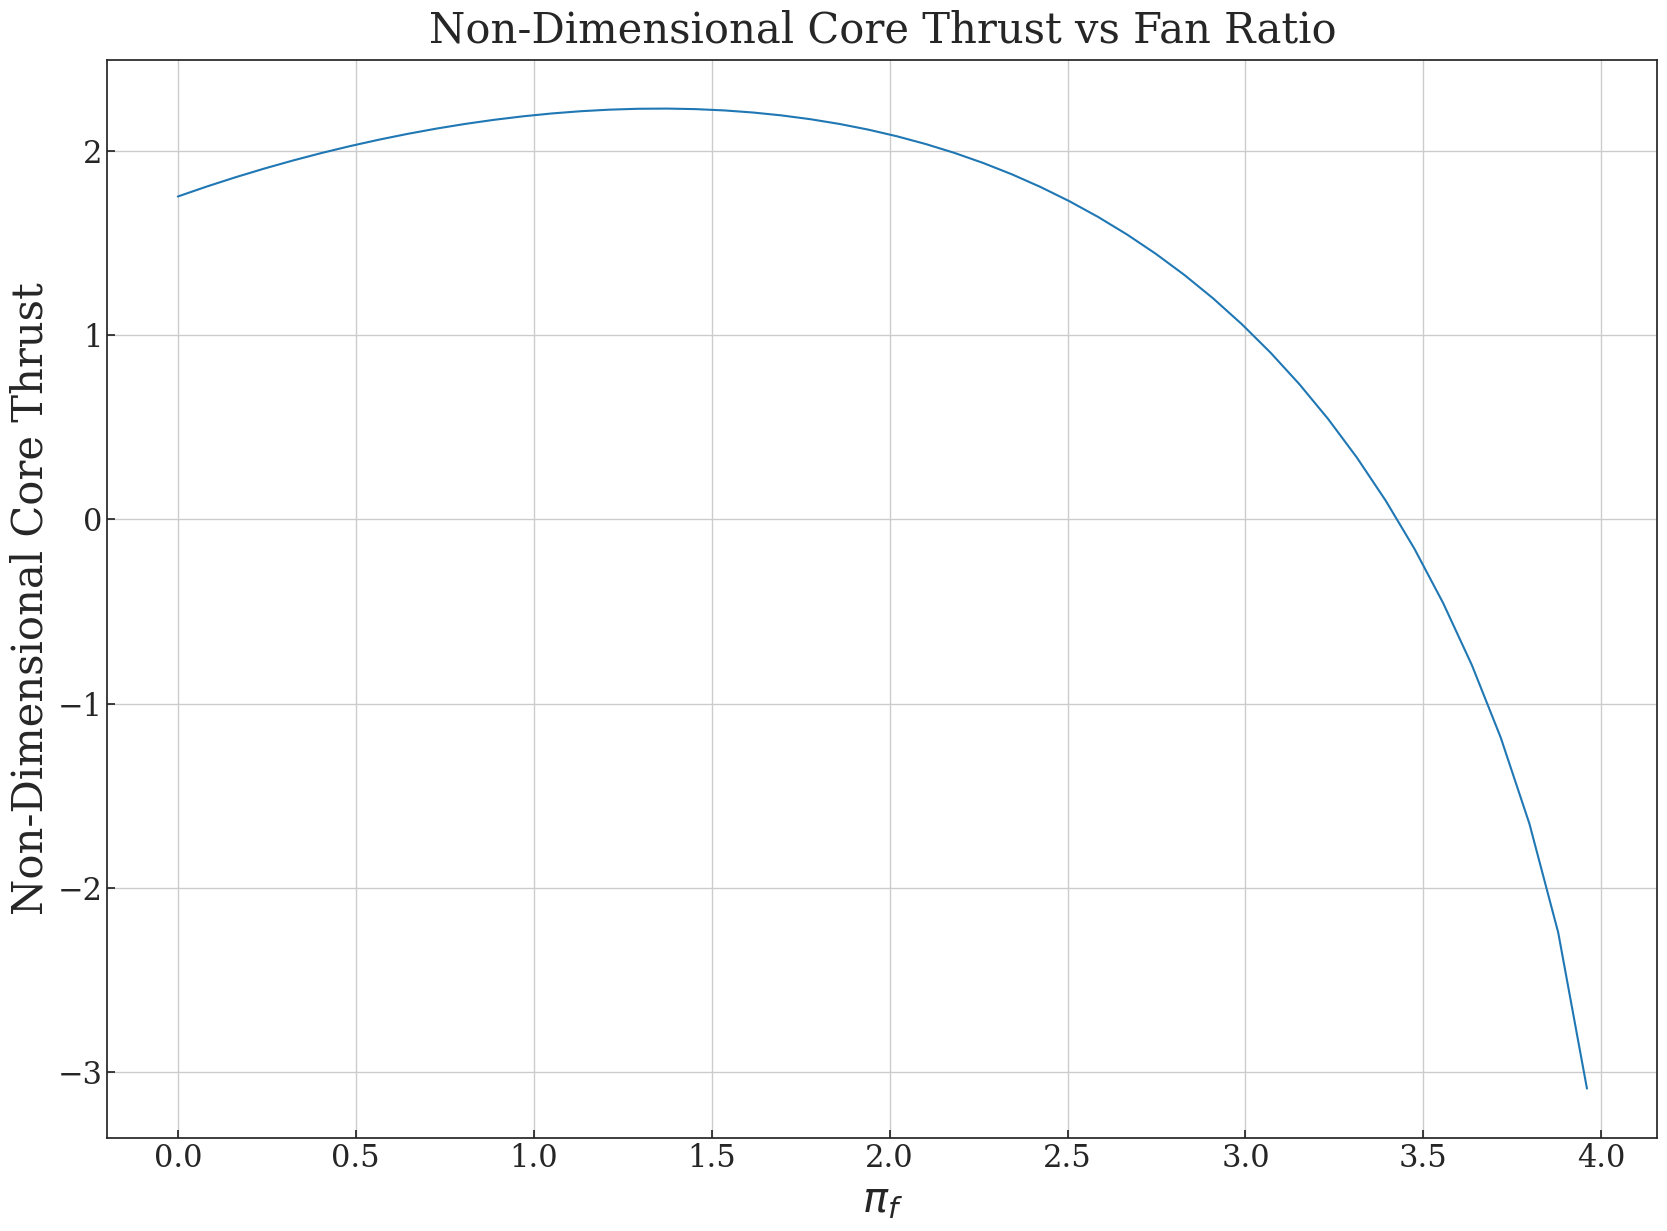

In [59]:
#part 3

x = np.linspace(0,8,100)
TSFCaa, nonDimensionalThrust, nonDimensionalCoreThrust = calcPressRatio(alpha = x)

plt.figure(figsize=(20,14))
plt.title("Non-Dimensional TSFC vs Bypass Ratio")
plt.plot(x,TSFCaa,linestyle = "-",color = colors[0],label = "TSFCaa")
plt.xlabel(r"$\alpha$")
plt.ylabel("TSFCaa")

plt.figure(figsize=(20,14))
plt.title("Non-Dimensional Thrust vs Bypass Ratio")
plt.plot(x,nonDimensionalThrust,color = colors[0],label = "NDThrust")
plt.xlabel(r"$\alpha$")
plt.ylabel("Non-Dimensional Thrust");

plt.figure(figsize=(20,14))
plt.title("Non-Dimensional Core Thrust vs Fan Ratio")
plt.plot(x,nonDimensionalCoreThrust,color = colors[0],label = "NDThrust")
plt.xlabel("$\pi_f$")
plt.ylabel("Non-Dimensional Core Thrust");



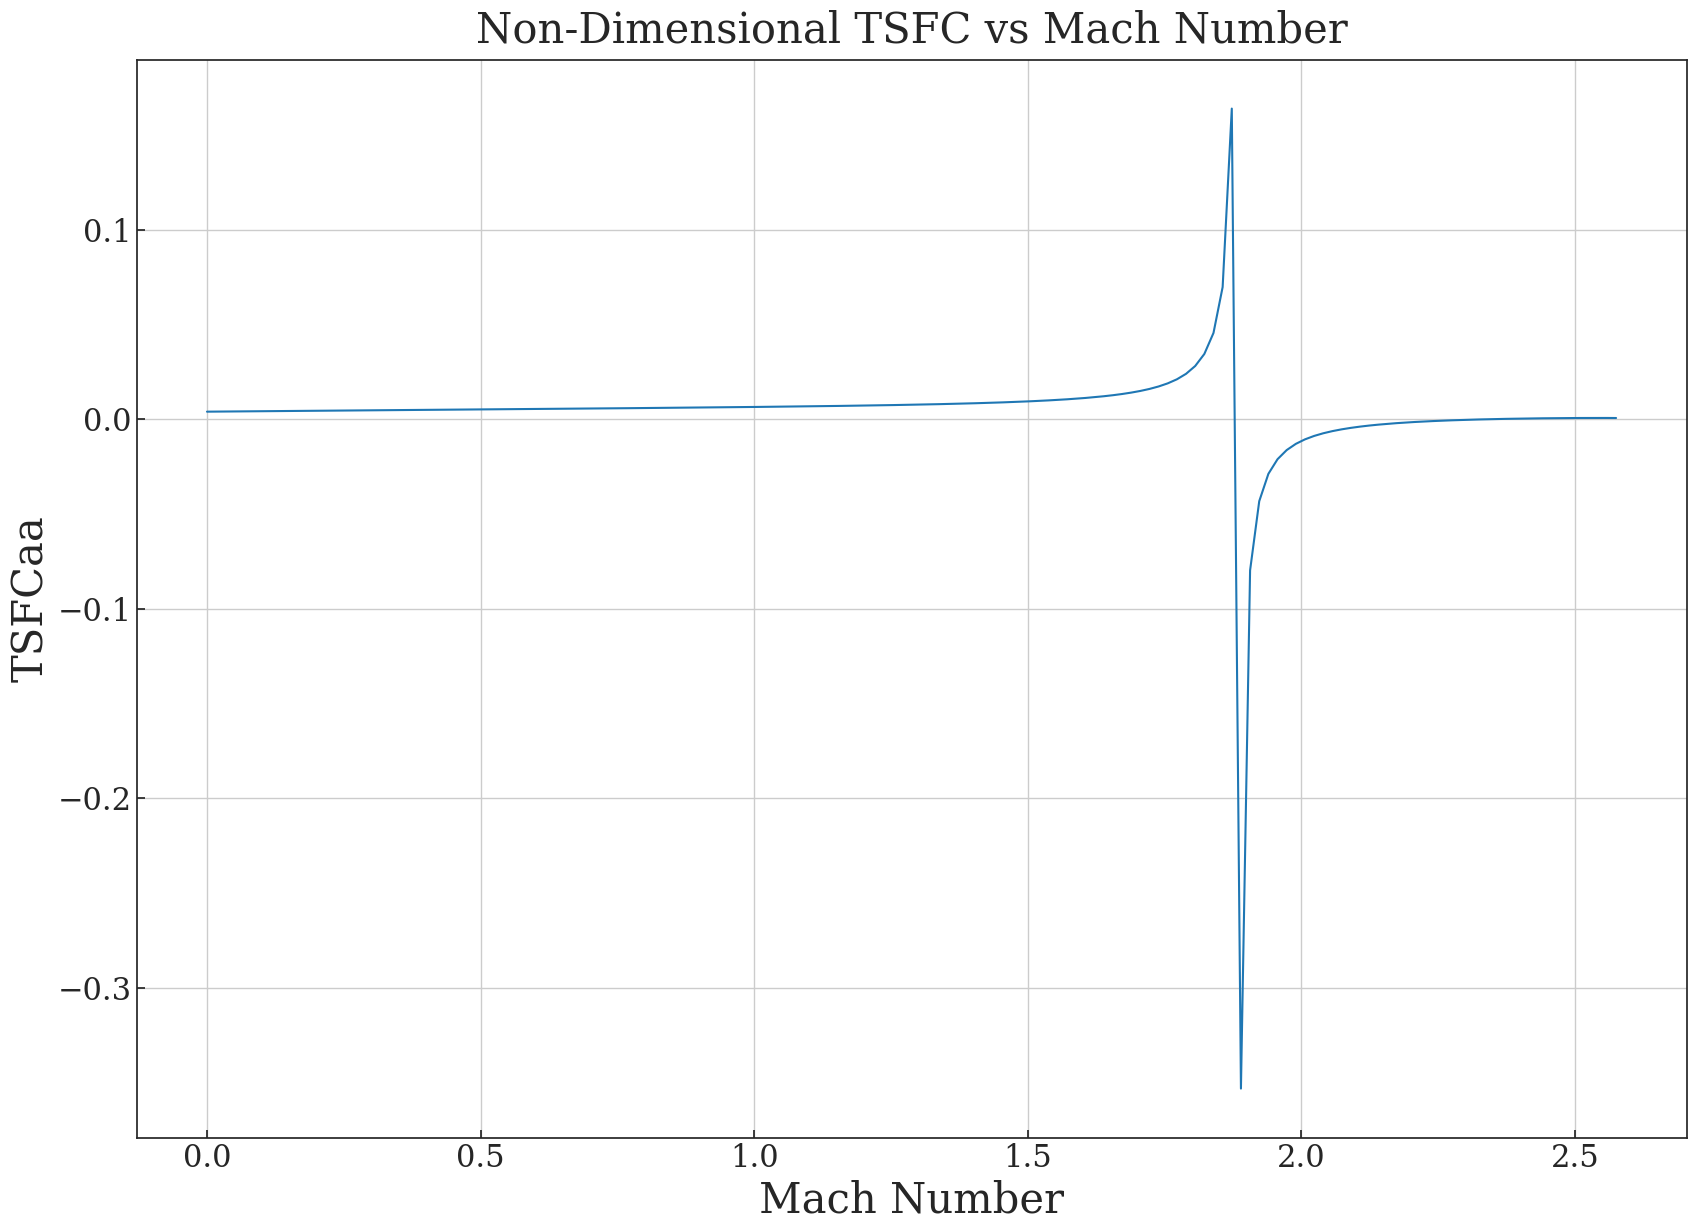

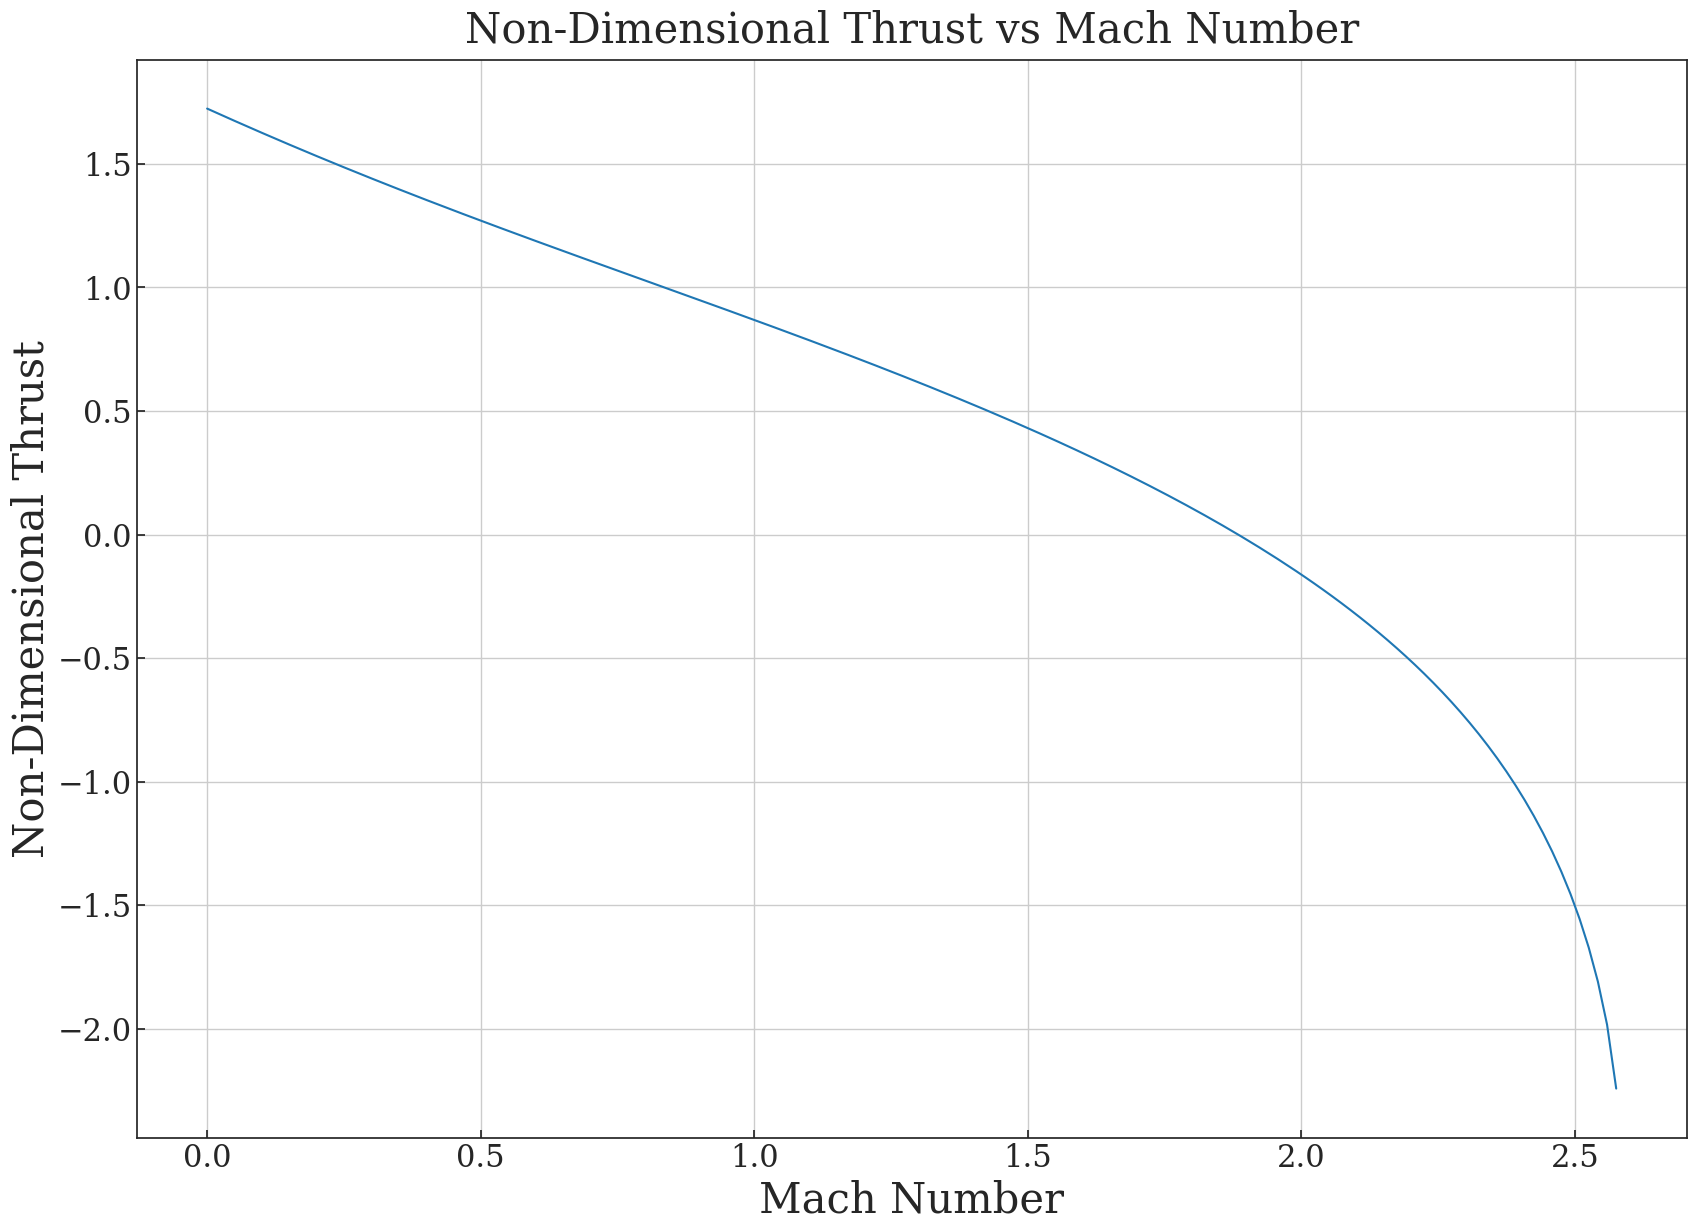

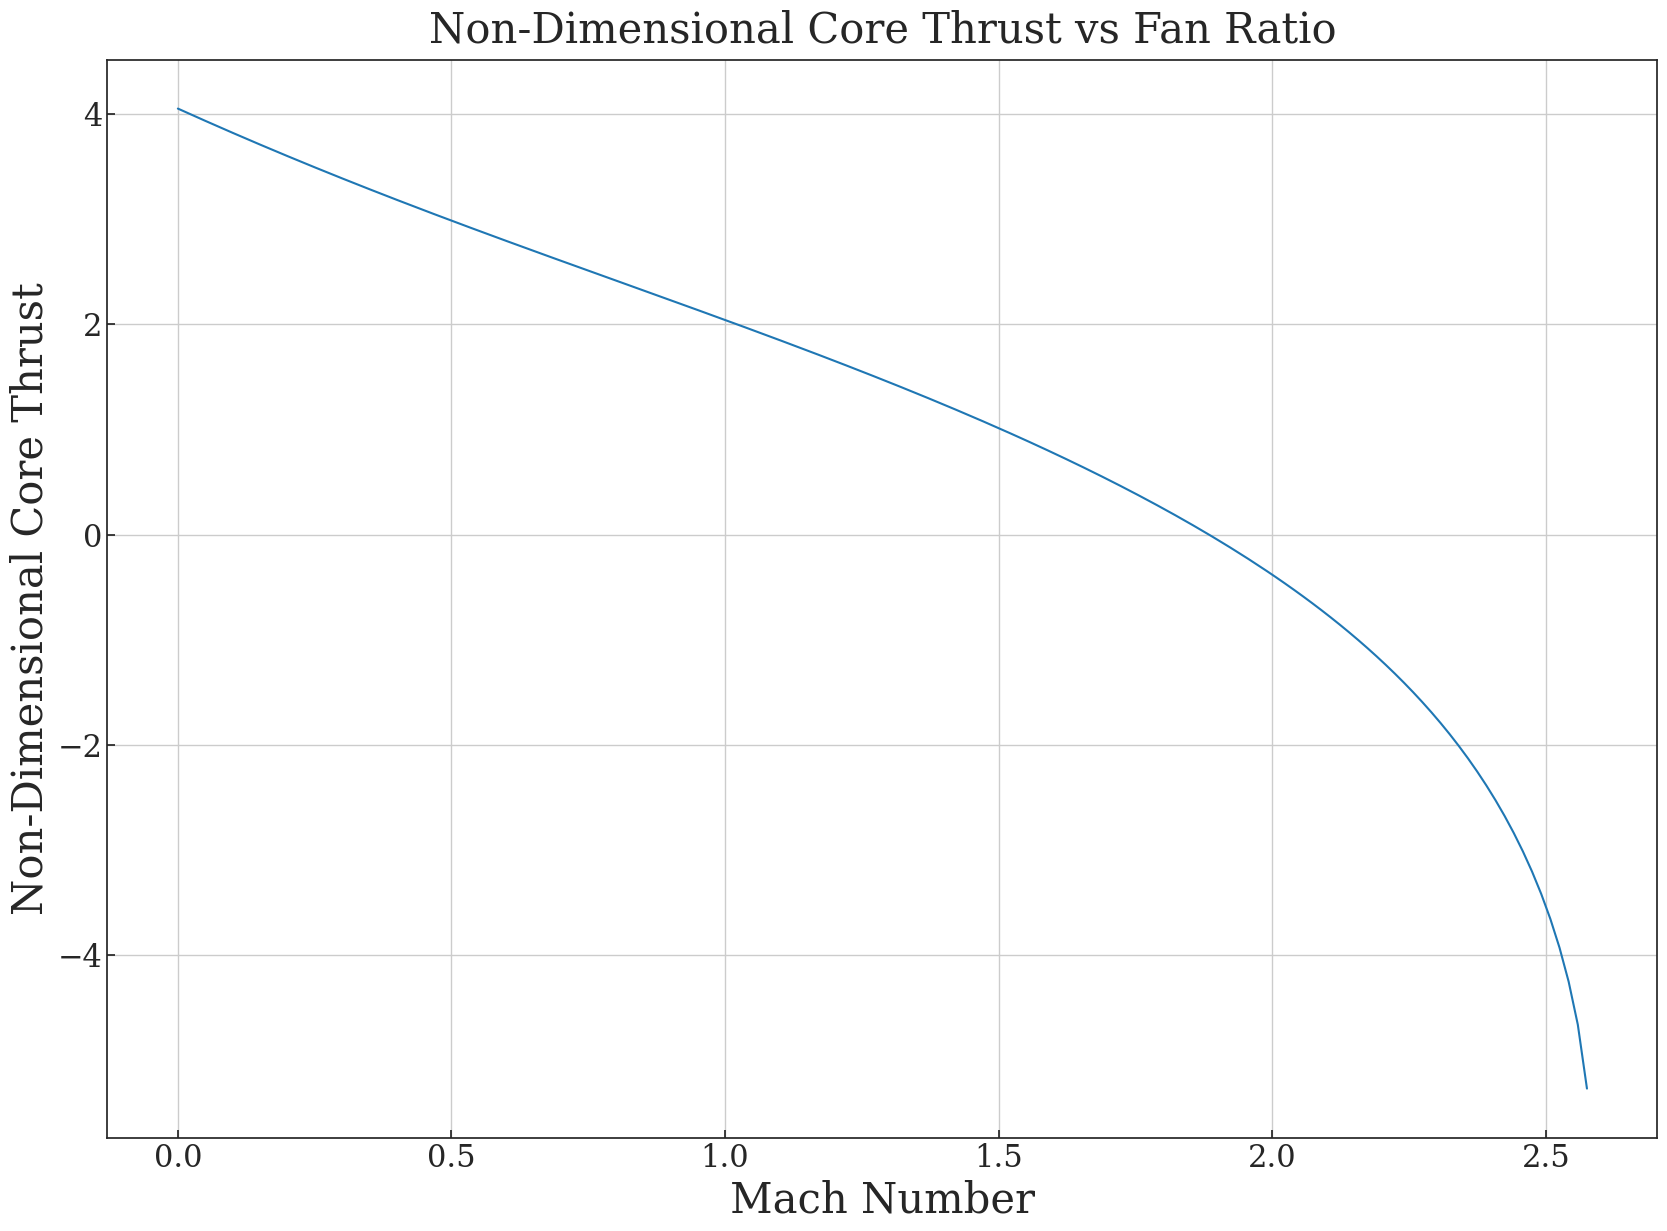

In [60]:
x = np.linspace(0,5,300)
TSFCaa, nonDimensionalThrust, nonDimensionalCoreThrust = calcPressRatio(Ma=x)

plt.figure(figsize=(20,14))
plt.title("Non-Dimensional TSFC vs Mach Number")
plt.plot(x,TSFCaa,linestyle = "-",color = colors[0],label = "TSFCaa")
plt.xlabel("Mach Number")
plt.ylabel("TSFCaa")

plt.figure(figsize=(20,14))
plt.title("Non-Dimensional Thrust vs Mach Number")
plt.plot(x,nonDimensionalThrust,color = colors[0],label = "NDThrust")
plt.xlabel("Mach Number")
plt.ylabel("Non-Dimensional Thrust");

plt.figure(figsize=(20,14))
plt.title("Non-Dimensional Core Thrust vs Fan Ratio")
plt.plot(x,nonDimensionalCoreThrust,color = colors[0],label = "NDThrust")
plt.xlabel("Mach Number")
plt.ylabel("Non-Dimensional Core Thrust");